In [1]:
!pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-cp37-none-any.whl size=36090 sha256=d11cb079795e66689b8603abbebdd4b95bb720341bfef8c4a24414a69e8cdd78
  Stored in directory: C:\Users\aonno\AppData\Local\pip\Cache\wheels\05\2c\72\5324e267426eea65dec0c21a12a48b15887c0cf686c7a8fe11
Successfully built nsepy


https://analyticsindiamag.com/hands-on-guide-to-lstm-recurrent-neural-network-for-stock-market-prediction/

In [10]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [3]:
# fetching 6 years of histrical prices

start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data = gh(symbol='SBIN',start=start, end=end)

W0615 00:08:52.360683 12360 connectionpool.py:298] Connection pool is full, discarding connection: www1.nseindia.com
W0615 00:08:52.364681  2684 connectionpool.py:298] Connection pool is full, discarding connection: www1.nseindia.com
W0615 00:08:52.365671  7000 connectionpool.py:298] Connection pool is full, discarding connection: www1.nseindia.com
W0615 00:08:52.365671  2760 connectionpool.py:298] Connection pool is full, discarding connection: www1.nseindia.com
W0615 00:08:52.366667  9988 connectionpool.py:298] Connection pool is full, discarding connection: www1.nseindia.com
W0615 00:08:52.368660 11292 connectionpool.py:298] Connection pool is full, discarding connection: www1.nseindia.com
W0615 00:08:52.377636 10796 connectionpool.py:298] Connection pool is full, discarding connection: www1.nseindia.com
W0615 00:08:56.629639 12360 connectionpool.py:298] Connection pool is full, discarding connection: www1.nseindia.com
W0615 00:08:56.630637  2760 connectionpool.py:298] Connection po

c:\installs\anaconda\envs\tf_gpu\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


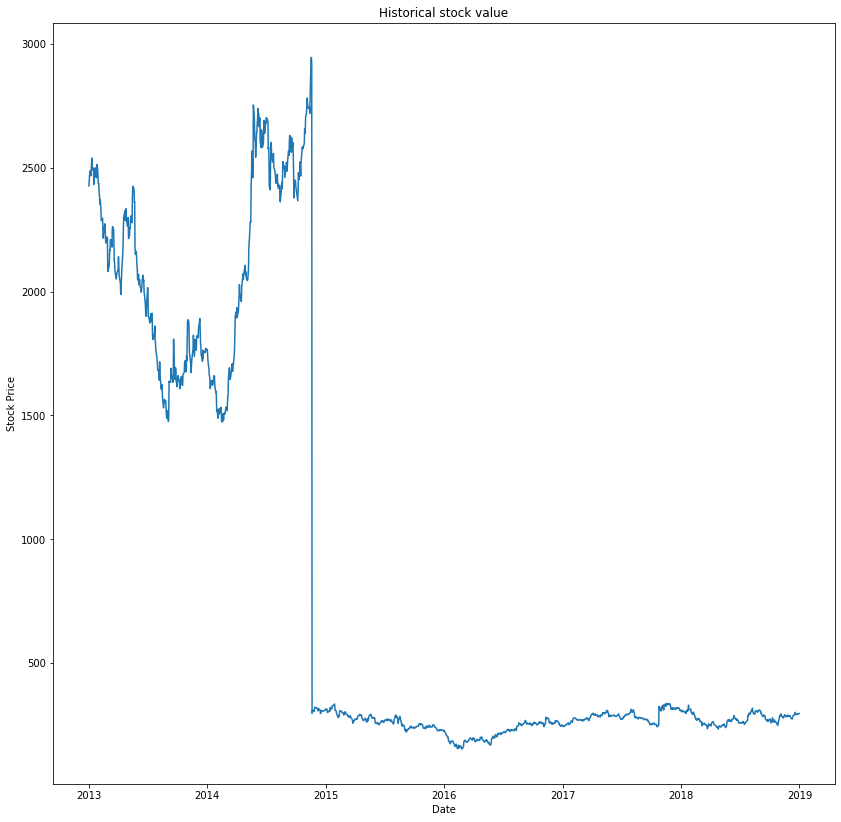

In [4]:
# visualising the fetched data
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical stock value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [5]:
# selecting the columns of interest

stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [7]:
# preprocessing the data to prepare it for th elstm model

train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
# Defining the LSTM network

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [13]:
# compiling and training the model

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=15, batch_size=32)

W0615 00:11:05.843082 13276 module_wrapper.py:139] From c:\installs\anaconda\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/15
1422/1422 [==============================] - 10s 7ms/step - loss: 0.0219
Epoch 2/15
1422/1422 [==============================] - 8s 5ms/step - loss: 0.0080
Epoch 3/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0073
Epoch 4/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0077
Epoch 5/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0071
Epoch 6/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0060
Epoch 7/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0057
Epoch 8/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0055A: 0s - loss: 0.005
Epoch 9/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0040
Epoch 10/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0039
Epoch 11/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0050
Epoch 12/15
1422/1422 [==============================] - 8s 6ms/s

In [14]:
# getting the testing data
testdataframe= gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [15]:
# testing the LSTM on new dataset

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

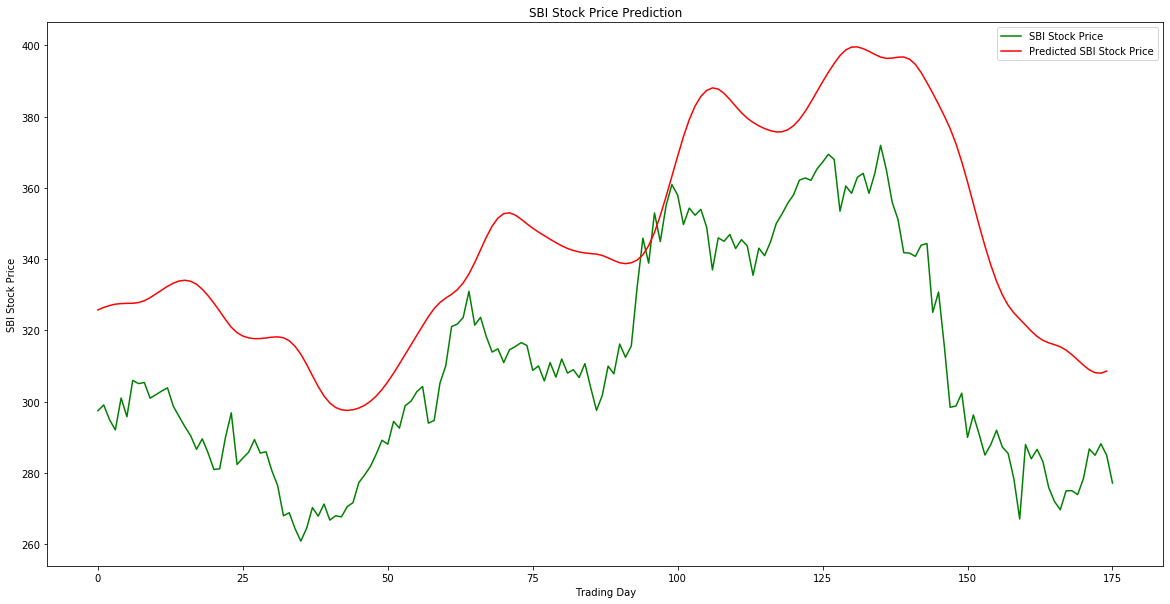

In [16]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()